Імпорт необхідних бібліотек та уведення функцій які використовувалися у минулих лабах.

In [5]:
import skimage
from skimage import data
import os
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import cv2
import math


# loading and preprocessing image
def preprocess_image(image_path):
    image = io.imread(image_path)
    if image.shape[2] > 3:
        pic = np.delete(image, 3, 2)
    return image


# preprocessing list of image-paths
def preprocess_image_list(images):
    result_image_list = []
    for image_path in images:
        image = preprocess_image(image_path)
        result_image_list.append(io.imread(image_path))
    return result_image_list


# processing image
def process_image(pic, x_axis_size, y_axis_size):
    gray = cv2.cvtColor(pic, cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)
    dst = cv2.cornerHarris(gray,2,3,0.04)
    np.shape(dst)
    res = cv2.dilate(dst,None)
    pic[dst>0.05*dst.max()]=[0,0,255]
    return pic, res


#processing list of paths
def process_image_list(images):
    preprocessed = preprocess_image_list(images)
    canny_images = []
    calculations = []
    for image in preprocessed:
        temp_canny, temp_calc = process_image(image, image.shape[0], image.shape[1])
        canny_images.append(temp_canny)
        calculations.append(temp_calc)
    return canny_images, calculations

# prints image info
def print_image_info(image_paths, images):
    if len(image_paths) != len(images):
        return
    for i in range(0, len(image_paths)):
        print(image_paths[i], end=' ')
        plt.figure()
        plt.imshow(images[i])
    
    if i % 3 == 0:
        print('', end='\n')
        
# creates array of correct answers for image recognition     
def create_correct_result(a, b=0):
    if b != 0:
        return np.concatenate((np.ones(a), np.zeros(b)))
    else:
        half_size = int(a / 2)
        ones = np.ones(half_size)
        zeros = np.zeros(half_size)
        return np.concatenate((ones, zeros))
# checks how accurate is prediction model 
def check_recognition_correctness(predicted, correct_prediction):
    if predicted.shape[0] != correct_prediction.shape[0]:
        return
    correct_counter = 0
    for iterator in range(predicted.shape[0]):
        if predicted[iterator] == correct_prediction[iterator]:
            correct_counter += 1
    correct_percent = correct_counter / predicted.shape[0]
    print("recognition correctness = ", correct_percent, "% (" , correct_counter , "/", predicted.shape[0], ")")

./dataset/temp10.jpg ./dataset/temp11.jpg ./dataset/temp12.jpg ./dataset/temp13.jpg ./dataset/temp14.jpg ./dataset/temp15.jpg ./dataset/temp16.jpg ./dataset/temp17.jpg ./dataset/temp18.jpg ./dataset/temp19.jpg ./dataset/temp20.jpg ./dataset/temp21.jpg ./dataset/temp22.jpg ./dataset/temp23.jpg ./dataset/temp24.jpg ./dataset/temp36.jpg ./dataset/temp37.jpg ./dataset/temp38.jpg ./dataset/temp39.jpg ./dataset/temp40.jpg ./dataset/temp41.jpg ./dataset/temp42.jpg ./dataset/temp43.jpg ./dataset/temp44.jpg ./dataset/temp45.jpg ./dataset/temp46.jpg ./dataset/temp47.jpg ./dataset/temp48.jpg ./dataset/temp49.jpg ./dataset/temp50.jpg 

C:\Users\maksy\Documents\Projects\Python\pattern_recoginition\.venv\lib\site-packages\ipykernel_launcher.py:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


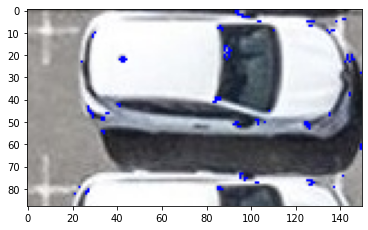

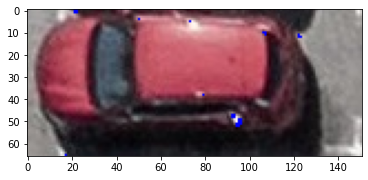

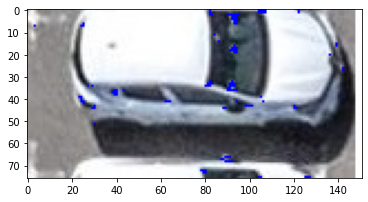

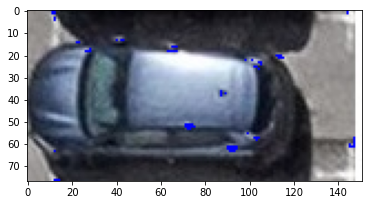

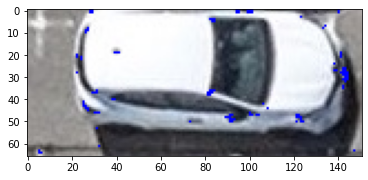

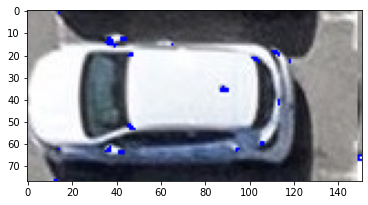

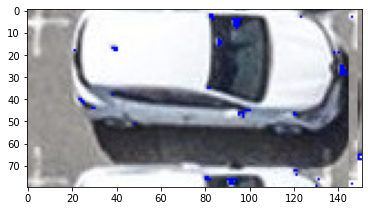

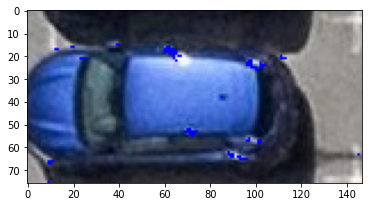

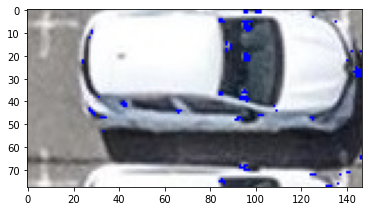

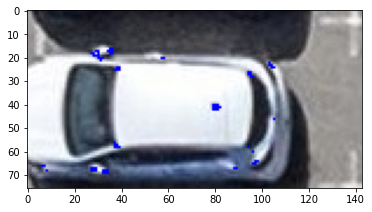

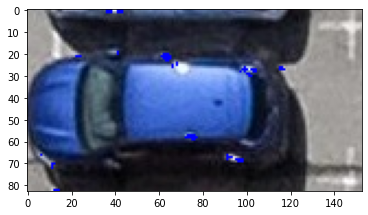

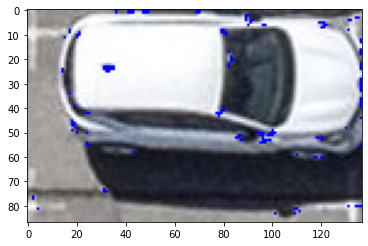

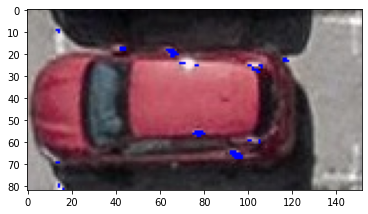

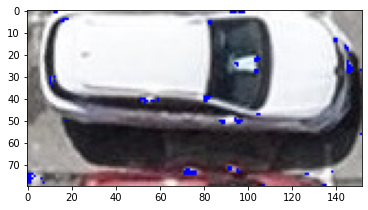

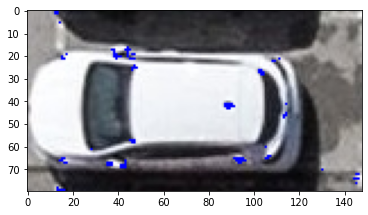

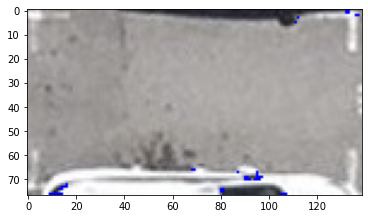

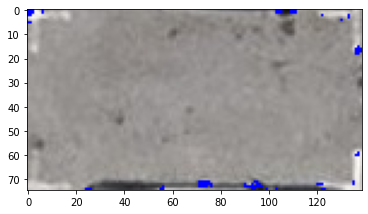

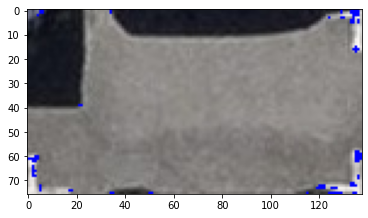

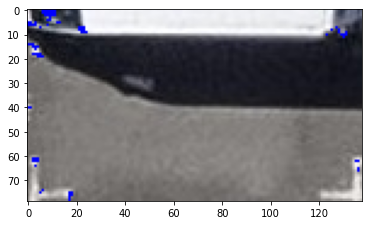

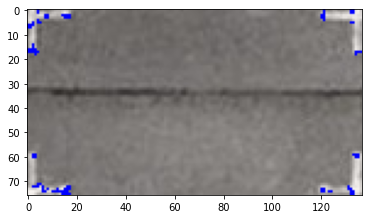

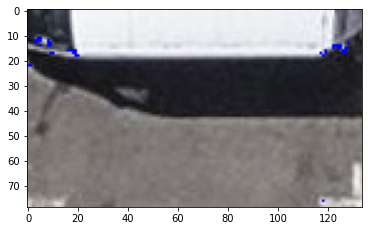

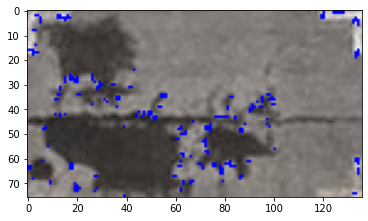

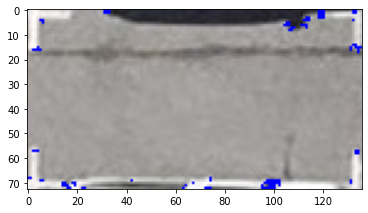

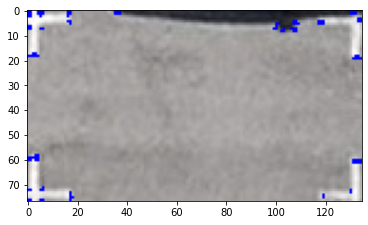

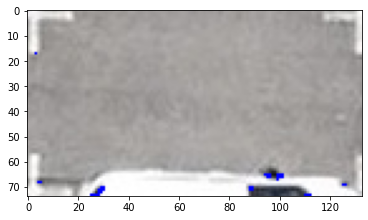

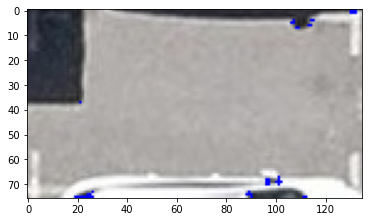

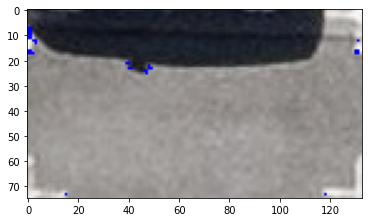

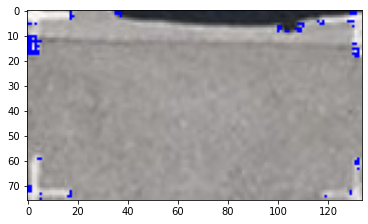

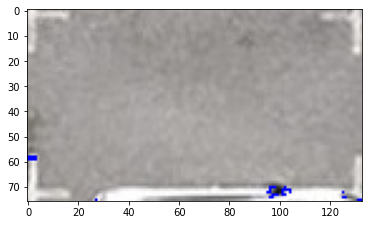

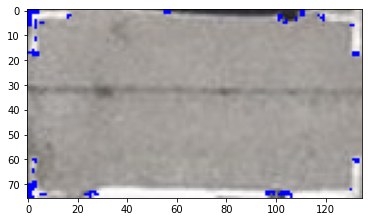

In [6]:
images = ["./dataset/temp10.jpg", "./dataset/temp11.jpg", "./dataset/temp12.jpg",
          "./dataset/temp13.jpg", "./dataset/temp14.jpg", "./dataset/temp15.jpg",
          "./dataset/temp16.jpg", "./dataset/temp17.jpg", "./dataset/temp18.jpg",
          "./dataset/temp19.jpg", "./dataset/temp20.jpg", "./dataset/temp21.jpg",
          "./dataset/temp22.jpg", "./dataset/temp23.jpg", "./dataset/temp24.jpg",
          "./dataset/temp36.jpg", "./dataset/temp37.jpg", "./dataset/temp38.jpg",
          "./dataset/temp39.jpg", "./dataset/temp40.jpg", "./dataset/temp41.jpg",
          "./dataset/temp42.jpg", "./dataset/temp43.jpg", "./dataset/temp44.jpg",
          "./dataset/temp45.jpg", "./dataset/temp46.jpg", "./dataset/temp47.jpg",
          "./dataset/temp48.jpg", "./dataset/temp49.jpg", "./dataset/temp50.jpg", ]
canny_images, _ = process_image_list(images)

print_image_info(images, canny_images)
    